# Capstone project proposal by Jörg Schreiner

# Political orientation of Swiss communes from a data science perspective

This notebook is a template for your project proposal.

The details are outlined in the **Proposal** unit on the platform - you should address all points from those instructions with as many markdown/code cells as needed. This should include code, observations, discussions and the planned steps.

## 1) The problem

Using the detailed data that is available
- about ~2'000 __Swiss municipalities__
- from sources like the __Federal Statistical Office__ or the __Federal Finance Administration__, supplemented with less conventional data providers like e.g. __Swiss Federal Railways__ or __geographical data__

I propose it will be possible
- to predict the __political orientation__ of the municipalities as expressed in federal or cantonal elections
- to find __significant factors__ that influence the political orientation
- to see __changes__ in these factors over time

The dependent variable, political orientation, in the context of this project will be a single number that summarizes how far left-leaning or right-leaning a municipality has voted. This will be computed by assigning each party a left/right value and then getting the sum of party values weighted by election results.

An example: given party lr-values { GPS: -2, SP: -1, GLP: 0, CVP: 0, FDP: 1, SVP: 2 }, for the federal election results of 2019 in  
__Lausanne__: { GPS: 27%, SP: 27%, GLP: 7%, CVP: 2%, FDP: 15% and SVP: 9% } po = __-0.55__ and  
__Schwyz__: { GPS: 3%, SP: 18%, GLP: 3%, CVP: 25%, FDP: 20% and SVP: 35% } po = __+0.57__  
So Lausanne  leans to the left politically and Schwyz to the right. Intuitively that is not surprising. The aim of the capstone project is to quantify it and find out what leads to that (social, economic, geographic, ... factors).

What this project is not about: it's not about predicting future election results.

## 2) The data

### (a) Clear overview of your data

#### 2.a.1 Regionalporträts 2020: Kennzahlen aller Gemeinden
(Regional portraits 2020: key data of all communes)

Source: https://www.bfs.admin.ch/asset/de/je-d-21.03.01  
Download: https://www.bfs.admin.ch/bfsstatic/dam/assets/11587763/master  
Filename: je-d-21.03.01.xlsx (German; English version also available)  
Format: Excel  
Size: 1040 KB

This is the main data set for the project. It is an official statistic from the Bundesamt für Statistik (BFS) (Federal Statistical Office) of Switzerland. It has data from all 2202 municipalities (as of year 2019) with 41 variables. The data is mostly current (from 2017-2019) except for a few variables. Every Swiss commune is listed. The official commune id will be helpful joining the data with other data sets instead of relying on the commune names.

Features:
- Population: residents, change, density, foreigners
- Age distribution, 0-19y, 20-64y, 65+y
- Birth, mortality, marriage, divorce
- Households, number and size
- Area: total, settlements, agricultural, wooded, unproductive,  with changes
- Economy: employees, businesses, primary, secondary, tertiary sectors
- Housing: dwelling vacancy, new housing
- Social assistance rate
- Voter shares national elections for 10 parties (these will go into the political-orientation value)

All data is numerical. The data quality is supposed to be high (because of the source). There are missing values in the employees/workplaces and the social assistance variables. That happens when known values are not published for privacy reasons when the value is very small.

#### 2.a.2 Die 4 Sprachgebiete der Schweiz nach Gemeinden
(The 4 language areas of Switzerland by municipalities)

Source: https://www.atlas.bfs.admin.ch/maps/13/de/12474_3175_235_227/20584.html  
Download: https://www.atlas.bfs.admin.ch/core/projects/13/xshared/xlsx/20584_131.xlsx  
Filename: 20584_131.xlsx  
Format: Excel  
Size: 58 KB  

This contains one variable that contains the language for each commune (2255 communes, 2017). Values are one of ["Deutsches Sprachgebiet", "Französisches Sprachgebiet", "Italienisches Sprachgebiet", "Rätoromanisches Sprachgebiet"]. The communes are identified by their official id as in 2.a.1.

#### 2.a.3 Prämienregionen der Krankenversicherung
(Premium regions of health insurance)

Source: https://www.bag.admin.ch/bag/de/home/versicherungen/krankenversicherung/krankenversicherung-versicherer-aufsicht/praemienregionen.html  
Download: https://www.bag.admin.ch/dam/bag/de/dokumente/kuv-aufsicht/pus/praemienregionen/praemienregionen-version-maerz-2020.xlsx.download.xlsx/praemienregionen-version-maerz-2020.xlsx  
Filename: praemienregionen-version-maerz-2020.xlsx  
Format: Excel  
Size: 834 KB  

In the D_PRIM sheet we find
- canton (official two-letter code)
- premium region (codes [0, 1, 2, 3])
- mean monthly premium for adults, young adults and children (mean is for canton/region, not commune)

for 2'210 communes (year 2020), identified by their official id as in 2.a.1. 

#### 2.a.4 Durchschnittliches steuerbares Einkommen pro Kopf
(Average taxable income per capita)

Source: https://www.atlas.bfs.admin.ch/maps/13/de/15132_9164_9202_7267/23875.html  
Download: https://www.atlas.bfs.admin.ch/core/projects/13/xshared/xlsx/23875_131.xlsx  
Filename:  23875_131.xlsx  
Format: Excel  
Size: 98 KB  

This contains two variables, the taxable income as a total and per capita, for 2'294 communes (year 2016), identified by their official id as in 2.a.1. 

#### 2.a.5 SBB Billetautomaten
(Swiss Federal Railways SBB ticket vending machines)

Source: https://data.sbb.ch/explore/dataset/billetautomat/  
Download: https://data.sbb.ch/explore/dataset/billetautomat/download/?format=csv&timezone=Europe/Berlin&lang=de&use_labels_for_header=true&csv_separator=%3B  
Filename: billetautomat.csv  
Format: Comma-separated values  
Size: 164 KB  

This contains the locations of the 1385 SBB ticket vending machines. The information I want to use is simply the number of these in a commune. Therefore I am interested in the location (station) names (BPS NAME column) (often not the same as BFS community names) and the geo location (geopos column).

Why using this data and not, for example, a list of all public transport stops? I think that the Swiss public transport network is very dense, and including all stops including post cars and the like, would probably only tell me that 90%+ of communes have one. Vending machines on the other hand are only at train stations along the major axes. I hope that this will distinguish urban centers and well-connected communes from the remote ones.

#### 2.a.6 More ideas
If time allows or if required because above variables are not predictive enough, here are more ideas.

Conventional statistics:
- crime rates (https://www.bfs.admin.ch/bfs/en/home/statistics/crime-criminal-justice.html)
- commuters (https://www.bfs.admin.ch/bfs/en/home/statistics/mobility-transport/passenger-transport/commuting.html)

Other features:
- distance from border
- presence of military installations

### (b) Plan to manage and process the data

#### 2.b.1 Regionalporträts (Regional portraits)
- The data can be read using `pd.read_excel()`
- Replace special values ('*', 'X') with zeroes or other appropriate values, check for missing values, check data types
- Save the data as a plain csv-file with clean data

#### 2.b.2 Sprachgebiete (Language areas)
- The data can be read using `pd.read_excel()`
- Data is complete, no missing values
- One-hot encoding of the categorical variable into four columns language_de, language_fr, etc.
- Save the data as a plain csv-file with clean and one-hot encoded data

#### 2.b.3 Krankenversicherung (Health insurance)
- The data can be read using `pd.read_excel()`
- Data is complete, no missing values
- Save the data as a plain csv-file with clean data

#### 2.b.4 Steuerbares Einkommen (Taxable income)
- The data can be read using `pd.read_excel()`
- Data is complete, no missing values
- Save the data as a plain csv-file with clean data

#### 2.b.5 SBB Billetautomaten (SBB ticket vending machines)
- The data can be read using `pd.read_csv()`
- Geo location is contained in two coordinate systems, Swiss local reference system CH1903+, and as global latitude and longitude (WGS84).
- Data is complete, no missing values
- Save the data as a plain csv-file with clean data

#### 2.b.x General
- Renaming columns to be easily readable and in a consistent scheme (python-variable like)
- Optionally create a database and import the data into tables

Feature engineering:
- Add ratios of features, e.g. per-capita or per-area features (some are already present in the data)
- Add polynomial (squared) features or interaction features (products of features). Because of the high number of possible combinations, a strategy is needed to find a meaningful subset.
- Add change-rate (over time) to features. This would usually require to get historic data of the used data sets and compute the change rates. Some change rates are already present in the data.
- And of course the dependent variable, the political orientation value, needs to be computed.

Combining the data sets:
- Most data sets use the official commune id, which makes combining the data easy
- One obstacle is that the basic set of communes is not stable. Each year a few communes merge and form a new commune. I estimate that this concerns not more than ~100 communes. Either I drop these communes (they are small ones, and we have plenty of those) or use a zero or mean value. In any case, the Swiss official commune register at the BFS documents the changes.
- Data sets that do not contain the official commune id can be merged by commune name or by geo location.
- By name: taking care of the language (e.g. Genf/Genève), spelling (e.g. Zürich/Zuerich/Zurich), and other issues (names that are not communes at all; Zürich Flughafen station is not in Zürich) can make this an expensive task.
- By geo location: in theory, this is very precise. The Swiss federal geo portal, https://www.geo.admin.ch/, has "swissBOUNDARIES3D municipal boundaries ... the administrative borders of the municipalities of Switzerland". They offer web services to access their data at https://api3.geo.admin.ch/index.html which seem well documented (but rather extensive). 


## 3) Exploratory data analysis (EDA)

### (a) Preliminary EDA

(Please note that a more detailed version of this is available in the notebooks read_regional_portraits.ipynb (for the first data file 2.a.1) and additional_data.ipynb (2.a.2-4)).
#### Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv(os.path.join("data", "processed", "regional_portraits4.csv"), index_col="commune_id")

What is regional_portraits4.csv?
- data files 2.a.1-4 have been loaded and merged by the commune_id
- there are 16 communes in 2.a.1 that are mergers of older no-longer existing communes in 2.a.2-4; new values have been manually calculated from the older ones (usually the sum)
- 2.a.5 (Billetautomaten) is not part of it (geo-matching will be implemented in the main submission)
- missing values: for employment, workplaces and social assistance, very small values are masked ('X') for data privacy reasons in the original data; they have been set to 0
- po-value (political orientation) has been computed from the vote shares

In [2]:
# how does the data look like?
print("shape =", df.shape)
print("columns =", df.columns)
df.head()

shape = (2202, 55)
columns = Index(['name', 'residents', 'population_change', 'population_density',
       'foreign_nationals_percent', 'age_0_19', 'age_20_64', 'age_65_over',
       'marriage_rate', 'divorce_rate', 'birth_rate', 'mortality_rate',
       'households', 'households_size', 'surface_area',
       'settlement_urban_area_percent', 'settlement_urban_area_change',
       'agricultural_area_percent', 'agricultural_area_change',
       'wooded_area_percent', 'unproductive_area_percent', 'employed_total',
       'employed_primary_sector', 'employed_secondary_sector',
       'employed_tertiary_sector', 'workplaces_total',
       'workplaces_primary_sector', 'workplaces_secondary_sector',
       'workplaces_tertiary_sector', 'dwelling_vacancy_rate',
       'new_housing_rate', 'social_assistance_rate', 'vote_share_fdp',
       'vote_share_cvp', 'vote_share_sp', 'vote_share_svp', 'vote_share_evp',
       'vote_share_glp', 'vote_share_bdp', 'vote_share_pda', 'vote_share_gps',
       '

,name,residents,population_change,population_density,foreign_nationals_percent,age_0_19,age_20_64,age_65_over,marriage_rate,divorce_rate,...,language_fr,language_it,language_rm,canton,health_region,health_premium_child,health_premium_young,health_premium_adult,total_tax_income,per_capita_tax_income
commune_id,,,,,,,,,,,,,,,,,,,,,
1.0,Aeugst am Albis,1982.0,8.662281,250.568900,13.874874,19.677094,62.764884,17.558022,4.588325,2.039256,...,0,0,0,ZH,3.0,90.31,242.1,335.73,101.3324,51255.639858
2.0,Affoltern am Albis,12229.0,10.260572,1154.768650,28.628670,20.508627,61.329626,18.161747,4.676923,2.133333,...,0,0,0,ZH,3.0,90.31,242.1,335.73,381.2711,32039.588235
3.0,Bonstetten,5548.0,7.540221,746.702557,16.005768,23.666186,60.310022,16.023792,4.159132,1.265823,...,0,0,0,ZH,3.0,90.31,242.1,335.73,214.2104,39413.137075
4.0,Hausen am Albis,3701.0,10.148810,272.132353,15.617401,21.804918,60.686301,17.508781,4.887984,2.172437,...,0,0,0,ZH,3.0,90.31,242.1,335.73,138.4407,38768.048166
5.0,Hedingen,3734.0,9.501466,571.822358,15.854312,21.772898,61.756829,16.470273,3.500269,1.884760,...,0,0,0,ZH,3.0,90.31,242.1,335.73,151.8671,41189.883374


#### Vote shares and po-values (target)
The target variable is the po-value, which is computed from the vote shares (of course the vote shares then *cannot* be used as independent variables later on).

In [3]:
vote_share_cols = [col for col in df.columns if col.startswith("vote_share_") and col != "vote_share_total"]
# vote_share_total computed as the sum
# df["vote_share_total"] = df[vote_share_cols].sum(axis=1)
df[vote_share_cols].describe().T.sort_values(by="mean", ascending=False)
# vote shares vary widely between communes, which is of course expected

,count,mean,std,min,25%,50%,75%,max
vote_share_svp,2202.0,31.119614,13.488360,0.0,21.294265,30.341544,39.427220,84.105431
vote_share_fdp,2202.0,14.910235,9.186436,0.0,8.691143,13.812501,19.987613,69.692308
vote_share_sp,2202.0,13.638741,6.399754,0.0,9.183769,13.273311,17.677013,49.344641
vote_share_cvp,2202.0,12.679215,13.944716,0.0,2.307491,7.969123,18.394949,79.545455
vote_share_gps,2202.0,11.002648,6.116198,0.0,6.885733,9.991772,14.663547,38.378378
vote_share_glp,2202.0,6.231430,4.039270,0.0,3.346843,6.052427,8.848411,23.778071
vote_share_bdp,2202.0,2.872597,4.961953,0.0,0.000000,0.953592,3.242650,64.576401
vote_share_evp,2202.0,2.332562,2.660542,0.0,0.452074,1.608542,3.383755,30.373832
vote_share_rightwing,2202.0,2.206915,4.241104,0.0,0.000000,0.634048,2.231820,27.197640
vote_share_pda,2202.0,0.793020,2.104188,0.0,0.000000,0.000000,0.482805,33.280289


6 very small communes without po-values, reason: 0 votes in data (data privacy)
mean = 0.48, std = 0.40


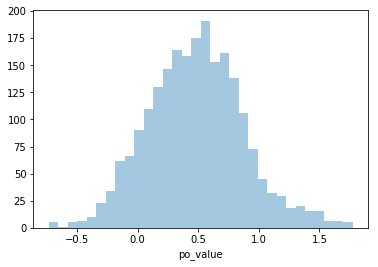

In [4]:
# Now we calculate the po-value using the left/right values of the parties and their vote shares:
# same order of parties as in vote_share_cols is important
party_lr_dict = {"fdp": 1, "cvp": 0, "sp": -1, "svp": 2, "evp": 0, "glp": 0, "bdp": 1, "pda": -2, "gps": -2, "rightwing": 2 }
party_lr_array = np.array(list(party_lr_dict.values()))
df["po_value"] = np.dot(df[vote_share_cols].values, party_lr_array) / df["vote_share_total"]

# Bundesrat: 2 sp, 2 fdp, 2 svp, 1 cvp -> (-2 + 2 + 4 + 0) / 7 = 0.57
# overall Nationalrat vote 2019 (manually calculated with values from top row of excel): 0.28

df["po_value"].fillna(0, inplace=True)
print("{} very small communes without po-values, reason: 0 votes in data (data privacy)".format((df["po_value"] == 0).sum()))
print("mean = {:.2f}, std = {:.2f}".format(df["po_value"].mean(), df["po_value"].std()))
sns.distplot(df["po_value"], kde=False);

- the target variable po-value  looks almost normally distributed (that's good)
- of course the chosen lr-values are in part subjective, but the po-value is obviously useful (e.g. comparing with Bundesrat or Nationalrat)
- only 6 communes are lacking the required data and can be dropped

#### Features
Distribution

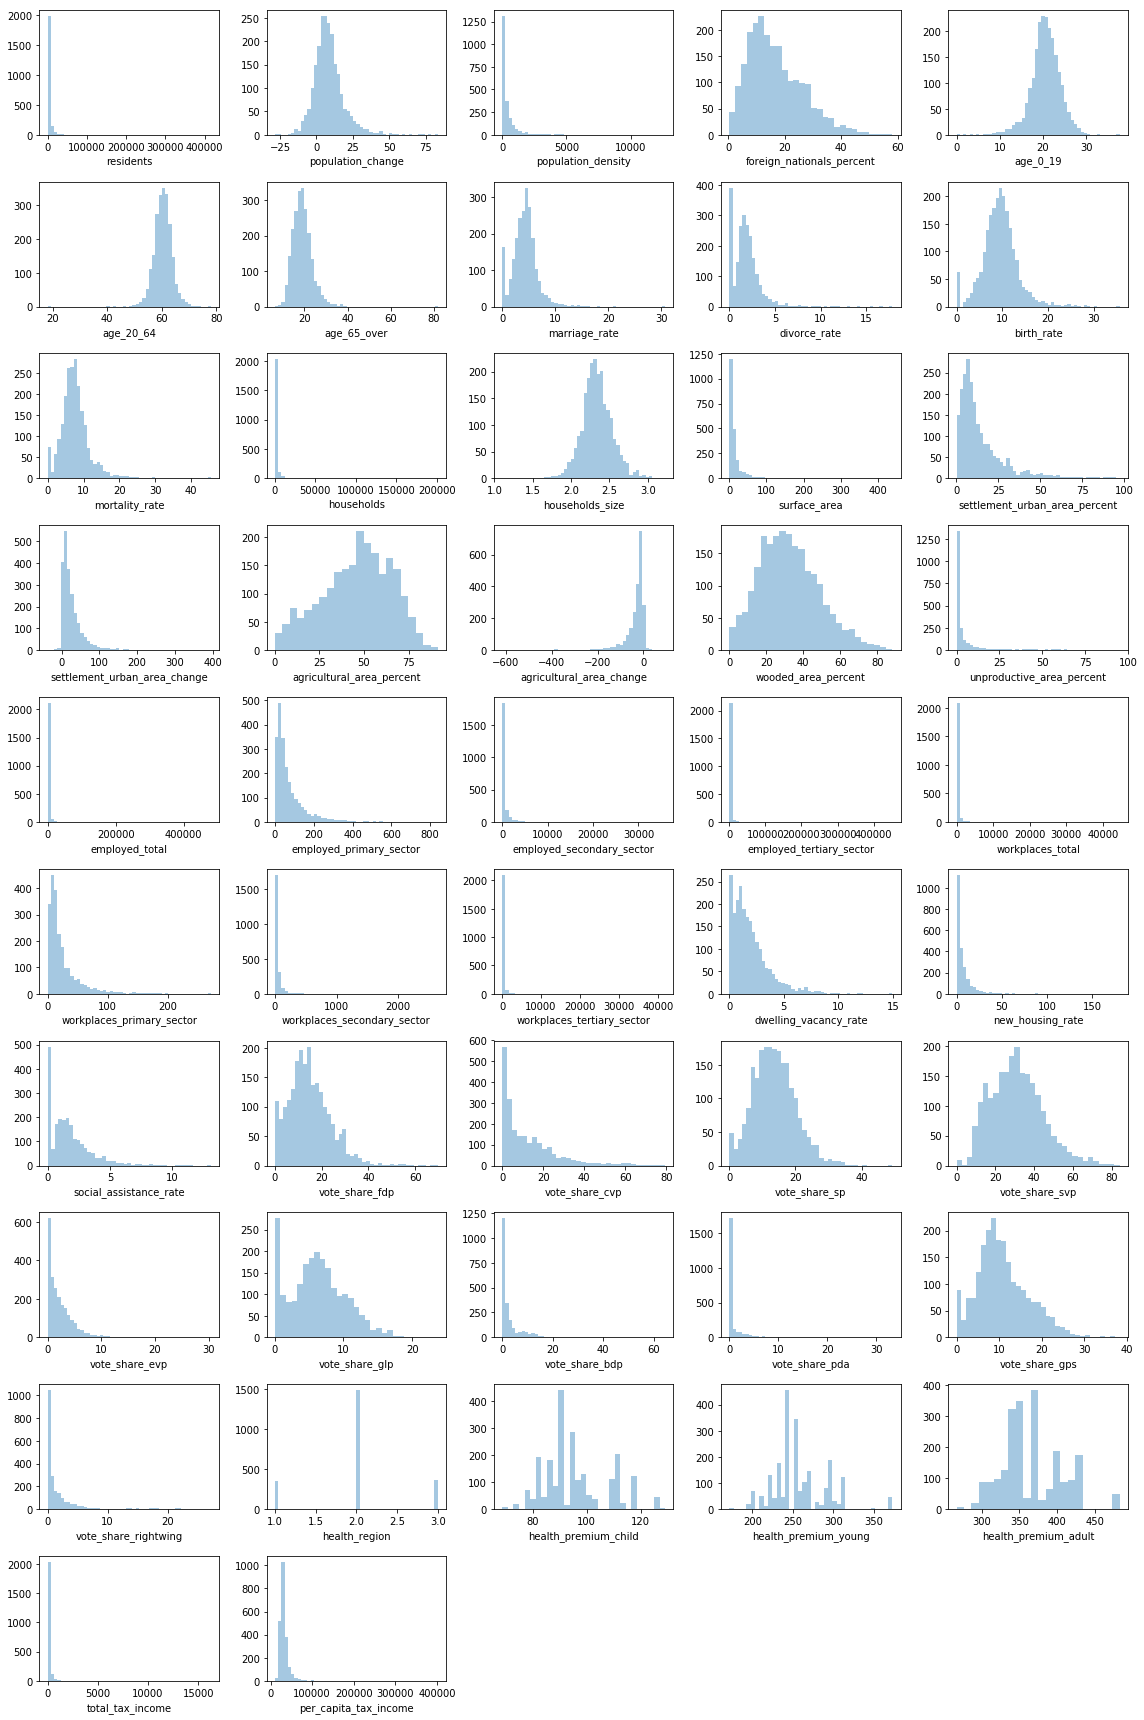

In [5]:
# plot the distributions of features (vote shares are plotted, but are in fact not considered features)
df2 = df.drop(columns=['language_de', 'language_fr', 'language_it', 'language_rm', 'canton', 'vote_share_total', 'po_value'])
cols = df2.columns[1:]
fig, axs = plt.subplots(10, 5, figsize = (16, 24))
for i, ax in enumerate(axs.flatten()):
    if i < len(cols):
        sns.distplot(df[cols[i]], kde = False, ax = ax)
    else:
        ax.set_axis_off()
plt.tight_layout()

The number of residents is right-skewed with a very long right tail. With a 99th percentil at ~30'000 residents, there remain a few large cities, like Zürich with > 400'000. Several features are strongly related to residents and look similar, e.g. households, employees or workplaces. Other features that have a long right tail are the surface area and the taxable income.

Correlations

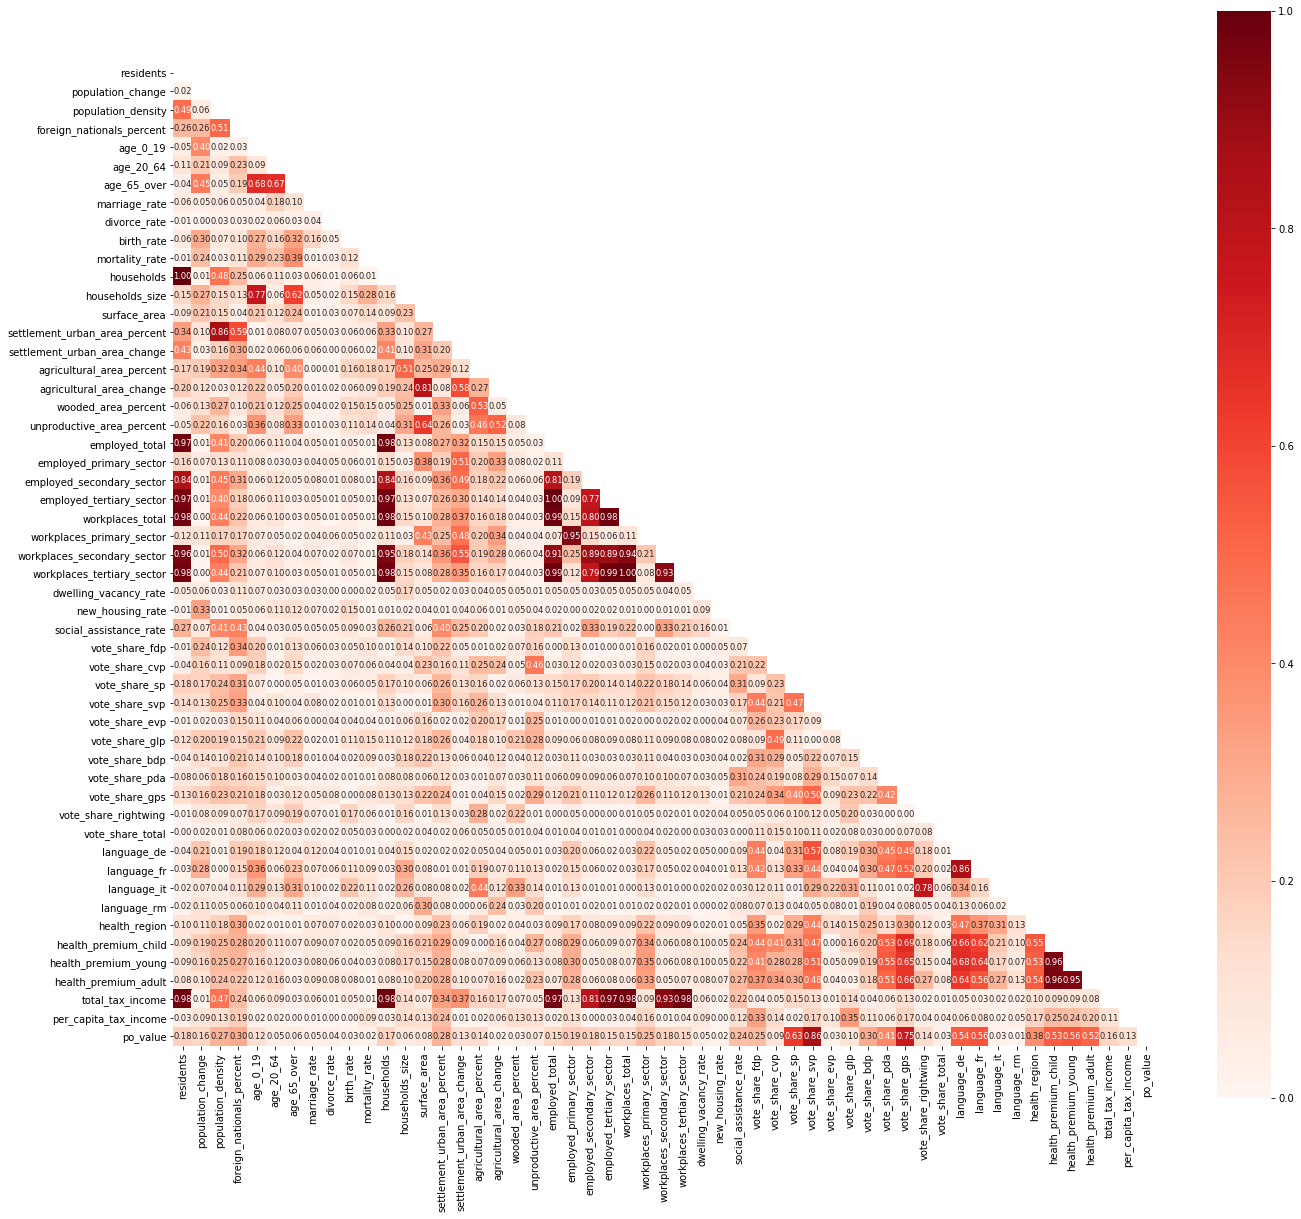

In [6]:
plt.figure(figsize = (22,20))
cols = df.columns.tolist()
cols.remove("po_value")
cols.append("po_value")
corr = np.abs(df[cols].corr())
sns.heatmap(corr, annot = True, fmt = '.2f',
            square=True, vmin = 0, vmax = 1, cmap= 'Reds', mask = np.triu(corr), annot_kws = {"fontsize":"small"});

- amongst features, (as already noted for the distributions), several variables are very strongly correlated with residents, which can be easily understood: households, employment/workplaces (but not primary sector!), total tax income
- same for health_premiums (children, adults)
- to the target, (ignoring vote shares), there are medium (~0.5) correlations with language de/fr and health premiums; weak correlations (~0.25) with foreign_nationals_percent, settlement_urban_area_percent, population_density, workplaces_primary_sector and social_assistance_rate

In [7]:
# cantons have a large impact on the po-value
df.groupby(by="canton").mean()["po_value"].sort_values()

canton
NE   -0.126306
GE   -0.077506
JU   -0.048115
BS    0.145005
VD    0.154801
BL    0.236412
VS    0.281907
FR    0.283175
ZG    0.293656
GL    0.308422
TI    0.408221
SO    0.445810
LU    0.502059
AI    0.545316
SG    0.614731
ZH    0.625123
AG    0.632785
GR    0.640945
UR    0.682868
TG    0.702993
BE    0.776854
SH    0.847708
SZ    0.920607
OW    0.967382
NW    1.320663
AR    1.514270
Name: po_value, dtype: float64

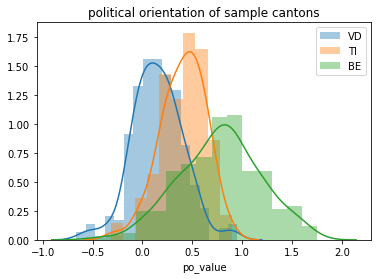

In [8]:
for ct in ["VD", "TI", "BE"]:
    sns.distplot(df[df["canton"] == ct]["po_value"], label=ct)
plt.legend()
plt.title("political orientation of sample cantons")
plt.show()

### (b) How does the EDA inform your project plan?

- the data collected so far is of high quality and can be combined easily, I do not expect a lot of extra work in that area
- an effort will be needed to handle the unbalancedness of some features, e.g. either log-transformation or even modelling large cities seperately
- not very strong correlations discovered so far, and the best features in that respect being more cantonal than communal, means that the models I will develop might lack accuracy 
    - I plan to acquire additional data sets e.g. from the excellent Interactive Statistical Atlas of Switzerland at https://www.bfs.admin.ch/bfs/en/home/statistics/regional-statistics/atlases/interactive-statistical-atlas-switzerland.html

### (c) What further EDA do you plan for project?

- Apply principal component analysis to the features and use a scree plot to analyze it
- Pairplots to visualize relation between (subsets of) features

## 4) Machine learning 

### (a) Phrase your project goal as a clear machine learning question

To predict the political orientation of a commune (measured by the numerical po-value) is a regression problem. I will use a linear regression model and tune it using the techniques that we have learned in course 3 to minimize the mean absolute error (e.g. outlier removal, feature engineering, standardization, regularization). This model should have a good *interpretability* and I would like to get from it insights like (hypothetical example) "other things equal, when health premiums are 10 Fr. higher, a commune leans on average 0.08 po-values to the left".

Then I want to find out if the linear regression model can be outperformed by some of the non-linear models that we learnt about in course 4. There we used them for classification tasks, but my research shows that there are variants for regression tasks in scikit-learn or Keras that I can use.

Finally, if indeed some model outperforms linear regression (has much better mean average error), I will discuss the accuracy vs. interpretability trade-off that occurs.

### (b) What models are you planning to use and why?

1. (Mandatory)
  - Linear regression model (sklearn.linear_model.LinearRegression)
2. (Optional, at least one of)
  - Random forest (sklearn.ensemble.RandomForestRegressor)
  - Support vector regression (sklearn.svm.SVR)
3. (Nice to have, but maybe too advanced)
  - Neural network with Keras (https://www.tensorflow.org/tutorials/keras/regression)

The linear regression model is chosen for interpretability and because it has been extensively covered in the course. The other models are chosen because in many cases they perform better (improved accuracy) at the cost of being hard to interpret.

### (c) Please tell us your detailed machine learning strategy 

Preprocessing
- compute the po-values from vote shares
- remove outliers, z-scores
- transformation (log or sklearn power-transformer)
- binning
- normalize features (zero mean, unit variance)
- separate the test data

Baseline
- predict the mean as baseline
- baseline MAE used in $R^2$ to calculate how good the models are (explained variance)

Training/Tuning
- grid-search with cross-validation for hyperparameters
- ensure optimal use of multi-core cpu for good runtime performance
- simple/ridge/lasso linear regression (regularization)
- mean absolute error MAE as loss function (less sensitive to outliers than RMSE)

Compare
- plot MAE and $R^2$ of the models
- discussion of differences

## 5) Additional information
None.